<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

- changes in space
- changes in time
- changes in concentration

### 1.3 Calculus: Meaning and Notation

- change in population depending on current size of population
- $N(t)$ where number of people at time t
- $dN(t)/dt$ is how much the $N(t)$ is changing
- r is a constant for rate of growth
- $dN/dt$ is the rate of change of N with respect to t; how much N change if increase t by a unit

### 1.4 Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

In [ ]:
# Your code here


### 1.5 Solving Differential Equations

In [ ]:

# Your code here


### 1.6 The Euler Method

In [ ]:

# Your code here


### 1.7 Using Euler for the logistic equation

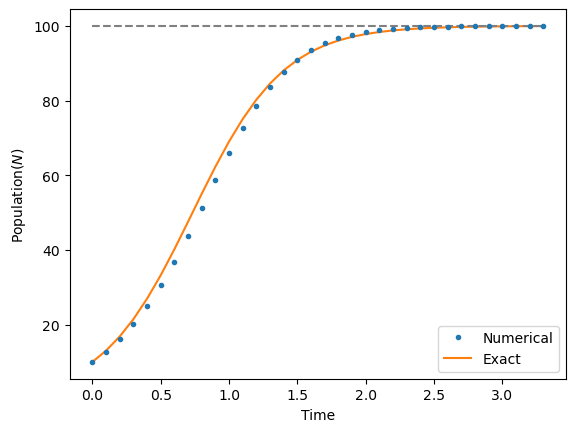

In [3]:
# Your code here

def logistic(time, N0, carrying_capacity, rate):
    '''
    This outputs the exact solution to 
    the logistic differential equation.
    '''
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output


N_stop_difference = 1E-2                # Stop running if the change in population
                                        # between consecutive runs is less than this value
dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)

    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt

    # Should we stop the loop?
    try:
        # The lists start empty so the following will raise an
        # error the first two rounds. I am using try to get around it.
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        # I am being paranoid and checking if there is an error even
        # when the list has more than two elements
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)

### 1.8 Some things to note about the code

1. using a dictionary to hold time and population data
2. use a 'true' condition with the 'while' loop, until 'break'
3. break out, check if population changed significantly
 - threshold
 - **never compare two floats**
 - compare the differences to be as small
4. wait for at least two rounds; use try-except
 - IndexError

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

In [ ]:

# Your code here


### 2.2 Example code

Text(0.5, 1.0, 'Foxes vs Rabbits')

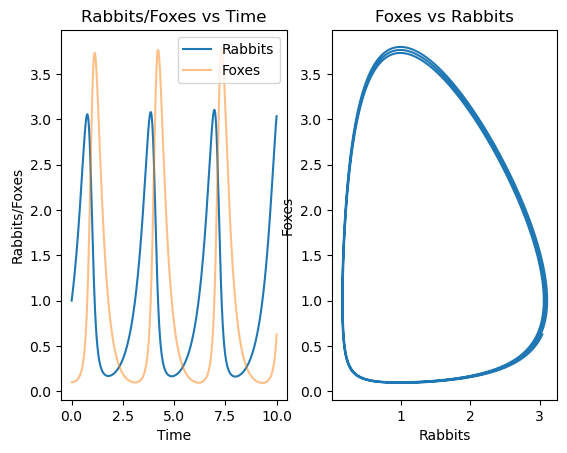

In [4]:
# Your code here

max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []


# Lotka-Volterra equations
def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    # Don't update the original variables because we need
    # the OLD values of rabbits to calculate foxes
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

    # Using the old value of rabbits
    foxes += dfoxes_dt(rabbits, foxes)*dt

    # No more need for two variables
    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break

# Reorganising the data so I can easily access
# them without having to mess with indices
data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

### 2.3 Some things to note about the code

1. encapsulating derivatives in functions
2. new variable `rabbit_new` to hold new values temporarily, as old value (in `rabbits`) are needed to calculate the new value for `foxes`
3. a list `data` to collect and split into dictionary later

## 3 Hello SciPy

### 3.1 SciPy odeint()

In [5]:
# Your code here

from scipy.integrate import odeint

# give initial values and functions to calculate various deriv
# python fxn to return f(y,x)
# odeint() expects dependent variable first before independent

### 3.2 Radioactivity

In [6]:
# Your code here

max_time = 0.05
dt = .001
decay_constant = 142       # For 85 Rb (per Myr)
N0 = 1                     # Starting value of N (in billions of atoms)


def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],                  # Initial values
               func=dNdt,                # Function for the drivative
               t=all_time,               # Time span
               args=(decay_constant,)    # Any arguments to dNdt
               )

### 3.3 Logistic Equation

In [7]:
# Your code here

def dNdt(N, time, rate, carrying_capacity):
    '''
    Function for the derivative.
    '''
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))

### 3.4 Predator-Prey

In [8]:
# Your code here

max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

# Lotka-Volterra equations
def dy_dt(y, t):
    '''
    Function for the derivative.
    - y contains all the variables for the simulation 
    - t is the dependant variable
    '''

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

# Note the order I pass the rabbit and fox information
results = odeint(y0=[rabbits0, foxes0],          # Dependant variable
                 func=dy_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results (Note, the order matters)
data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

## Exercise 1 :  The Lorentz Attaractor

[0, 0.01, 0.019892800000000002, 0.029682249182012153, 0.03937212651593719, 0.04896614254873503, 0.05846794115555735, 0.0678811012537227, 0.07720913848039548, 0.0864555068348116, 0.09562360028587472, 0.10471675434592984, 0.11373824761150256, 0.12269130327177569, 0.13157909058555772, 0.1404047263274814, 0.14917127620415438, 0.15788175624096795, 0.16653913414025515, 0.17514633061147317, 0.18370622067407158, 0.19222163493369235, 0.200695360832334, 0.2091301438730985, 0.21752868882012547, 0.22589366087430543, 0.23422768682535086, 0.2425333561807909, 0.2508132222724433, 0.2590698033409053, 0.2673055835985927, 0.2755230142718456, 0.28372451462260717, 0.2919124729501709, 0.3000892475734819, 0.3082571677944652, 0.31641853484284627, 0.3245756228029156, 0.332730679522683, 0.34088592750585445, 0.3490435647870561, 0.3572057657907214, 0.3653746821740464, 0.37355244365441204, 0.38174115882166076, 0.38994291593560815, 0.3981597837091617, 0.4063938120774101, 0.4146470329530388, 0.4229214609684203, 0.43

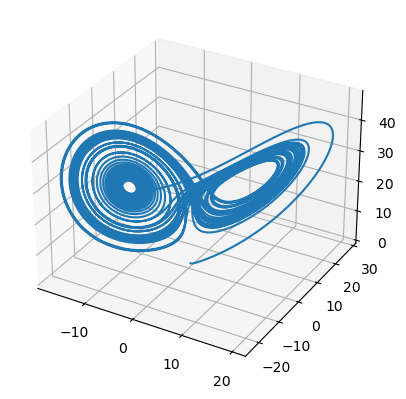

In [113]:
# Your solution here
# part 1 and 2

from matplotlib import pyplot as plt

σ = 10
β = 8/3
ρ = 28
dt = .001
t = 0
max_t = 50

x = [0]
y = [1]
z = [0]
#t = [0]

#np_x = np.array(x)
#np_y = np.array(y)
#np_z = np.array(z)
#np_t = np.array(t)

# zhen jie: use lambda function?

def dx_dt(x, y):
    return σ * (y - x) 
    
def dy_dt(x, y, z):
    return x * (ρ - z) - y

def dz_dt(x, y, z):
    return x * y - β * z

while t < max_t:
# dx_dt, dy_dt and dz_dt are all the change only
# need to add the change into the variable
    x.append(x[-1] + dx_dt(x[-1], y[-1]) * dt)
    y.append(y[-1] + dy_dt(x[-1], y[-1], z[-1]) * dt)
    z.append(z[-1] + dz_dt(x[-1], y[-1], z[-1]) * dt)

    t += dt

print(f'{x},{y},{z}')

ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
plt.show()

    #x_listy = []
    #y_listy = []
    #z_listy = []

    #x_listy.append(x)
    #y_listy.append(y)
    #z_listy.append(z)
    
    #x_new = dx_dt(x, y) * dt
    #y_new = dy_dt(x, y, z) * dt
    #z_new = dz_dt(x, y, z) * dt

    #x_listy.append(x_new)
    #y_listy.append(y_new)
    #z_listy.append(z_new)

    #x = x_new
    #y = y_new
    #z = z_new
    
    #x += 1
    #y += 1
    #z += 1

#for time in range(min_t, max_t):
 #   t.append(time)
    #dt = t_i[t - 1] - t_i[t]
#print(t_i)  time list is ok. use for plotting later
    
#print(x)

   # if t > max_t:
    #    break
    #x_listy.append(x)
    #y_listy.append(y)
    #z_listy.append(z)
    
    #print(t)
    #x_listy = x.append(x)
    #dx = dx_dt(x, t) * dt
    #dy = dy_dt(y, t) * dt
    #dz = dz_dt(z, t) * dt

#dx_dt(x, t), dy_dt(y, t), dz_dt(z, t)

#def sum(x):
#    return x+1